# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]  # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | uckfield
Processing Record 7 of Set 1 | dergachi
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | roosevelt
Processing Record 11 of Set 1 | san jose
Processing Record 12 of Set 1 | guanare
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | santa marta
Processing Record 16 of Set 1 | vorkuta
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | greymouth
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | acapulco de juarez
Processing Record 22 of Set 1 | forster
Process

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.16,99,100,10.95,TF,1691040389
1,invercargill,-46.4000,168.3500,10.57,88,88,1.79,NZ,1691040162
2,yellowknife,62.4560,-114.3525,16.29,72,40,2.57,CA,1691040391
3,albany,42.6001,-73.9662,17.23,82,31,0.45,US,1691040391
4,puerto ayora,-0.7393,-90.3518,23.64,91,31,0.89,EC,1691040392


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.16,99,100,10.95,TF,1691040389
1,invercargill,-46.4000,168.3500,10.57,88,88,1.79,NZ,1691040162
2,yellowknife,62.4560,-114.3525,16.29,72,40,2.57,CA,1691040391
3,albany,42.6001,-73.9662,17.23,82,31,0.45,US,1691040391
4,puerto ayora,-0.7393,-90.3518,23.64,91,31,0.89,EC,1691040392


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

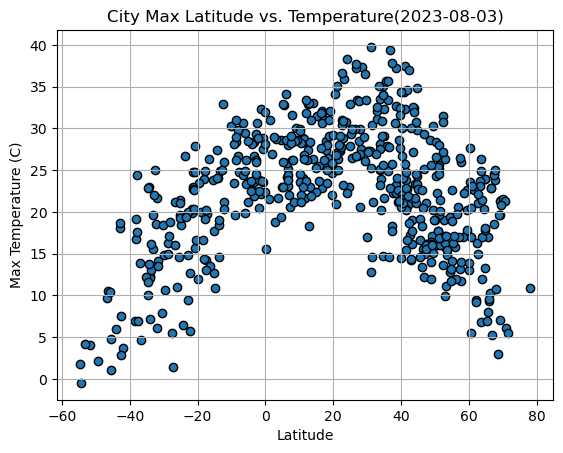

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o",edgecolor="black") # YOUR CODE HERE

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2023-08-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) # YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

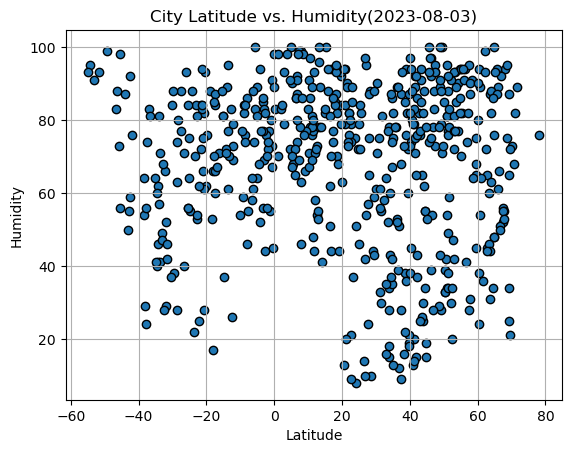

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2023-08-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

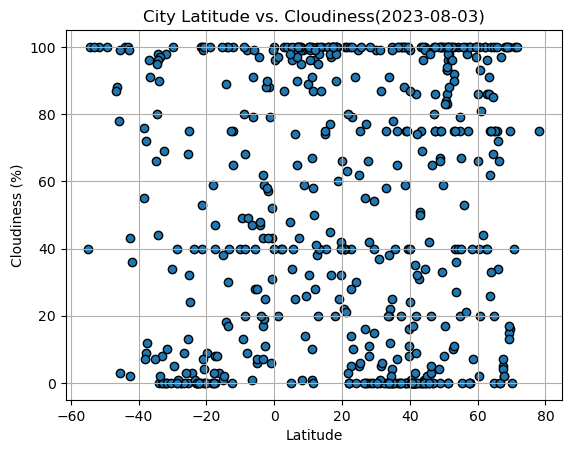

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2023-08-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

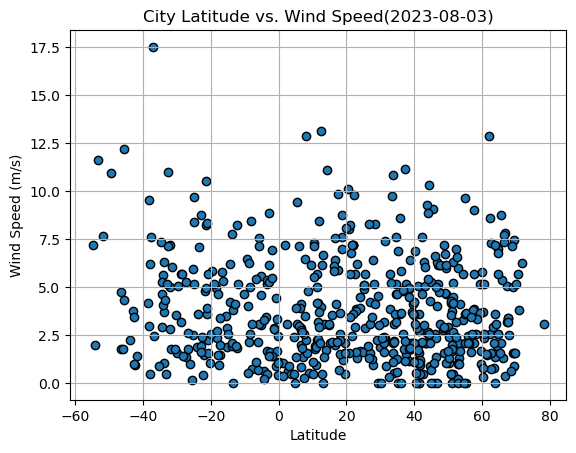

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(2023-08-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [133]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the regression line values
    regression_line = slope * x_values + intercept

    # Create the scatter plot
    plt.scatter(x_values, y_values, marker='o', edgecolor='black')

    # Plot the regression line
    plt.plot(x_values, regression_line, color='red')

    # Set plot labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

    # Calculate the position of the equation text using the least dense area
    heatmap, xedges, yedges = np.histogram2d(x_values, y_values, bins=(30, 30), range=[[min(x_values), max(x_values)], [min(y_values), max(y_values)]])
    heatmap = gaussian_filter(heatmap, sigma=1.0)
    x_text, y_text = np.unravel_index(np.argmin(heatmap), heatmap.shape)

    x_text = xedges[x_text] + 0.02 * (max(x_values) - min(x_values))
    y_text = yedges[y_text] + 0.02 * (max(y_values) - min(y_values))

    # Add the equation on the graph with red color
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation_text, (x_text, y_text), fontsize=14, color='red')

    # Print the R-value above the graph
    plt.text(0.5, 1.15, f"R-value = {r_value}", transform=plt.gca().transAxes, fontsize=12, color='black', ha='center', va='center')

    # Show plot
    plt.show()

    


In [122]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,16.29,72,40,2.57,CA,1691040391
3,albany,42.6001,-73.9662,17.23,82,31,0.45,US,1691040391
5,uckfield,50.9695,0.0959,16.04,95,86,4.16,GB,1691040392
6,dergachi,51.2328,48.7659,25.13,49,100,3.73,RU,1691040393
7,longyearbyen,78.2186,15.6401,10.91,76,75,3.09,SJ,1691040393


In [123]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.16,99,100,10.95,TF,1691040389
1,invercargill,-46.4000,168.3500,10.57,88,88,1.79,NZ,1691040162
4,puerto ayora,-0.7393,-90.3518,23.64,91,31,0.89,EC,1691040392
12,waitangi,-43.9535,-176.5597,6.01,87,100,2.24,NZ,1691040396
17,greymouth,-42.4667,171.2000,7.55,59,2,0.96,NZ,1691040399


###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


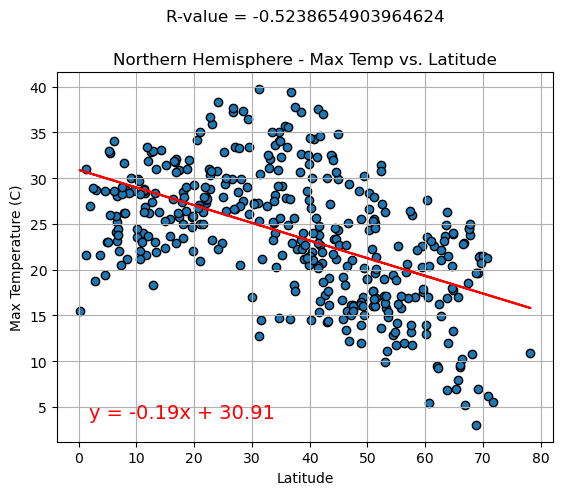

In [134]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", 
"Max Temperature (C)", "Northern Hemisphere - Max Temp vs. Latitude")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


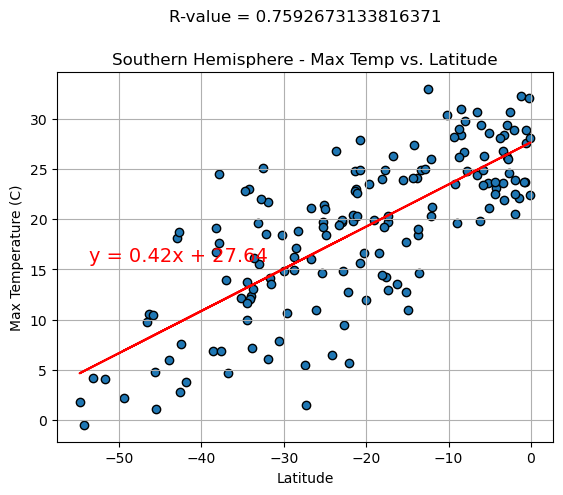

In [135]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", 
"Max Temperature (C)", "Southern Hemisphere - Max Temp vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [136]:
In analysing both plots, it is evident for both that as we move further away from the equator, the maximum temperature decreases.
The negative slope of the regression line in both plots further supports this observation, 
implying that both higher and lower latitudes experience lower temperatures.

SyntaxError: invalid syntax (1914330314.py, line 1)

### Humidity vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


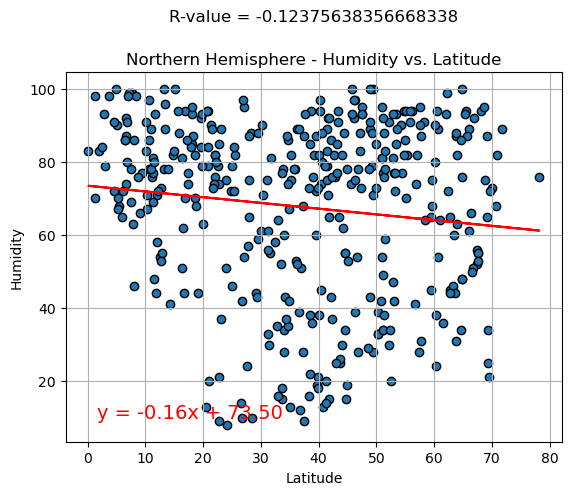

In [137]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 
"Northern Hemisphere - Humidity vs. Latitude")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


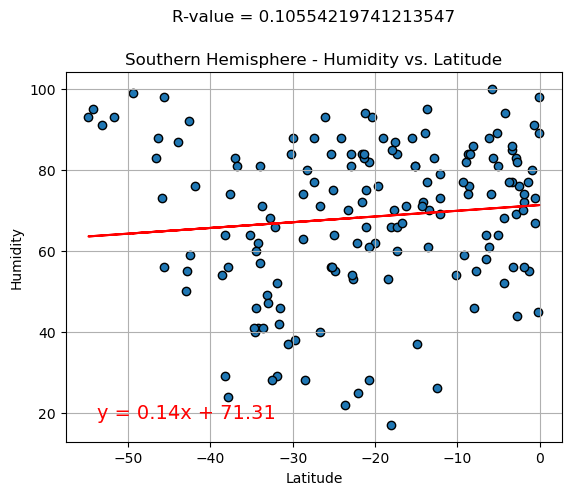

In [138]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", 
"Southern Hemisphere - Humidity vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Both plots show a rather weak linear regression slope. In both, the data points are scattered all across the graph.
This would suggest that latitude alone may not be an accurate enough predictor of humidity levels in either hemisphere, 
and other factors likely play a more significant role in influencing humidity patterns.
Although, there is slightly more humidity closer to the equator, the linear regression line is not particularly strong.

### Cloudiness vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


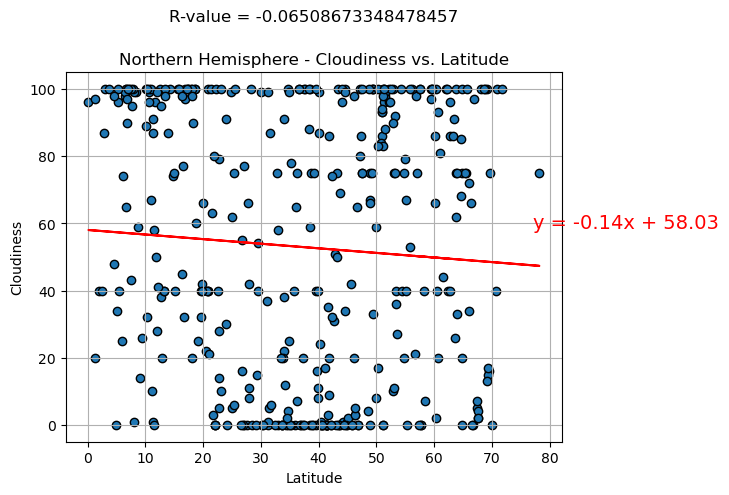

In [139]:
# Northern Hemisphere
# YOUR CODE HERE
# Call the plot_linear_regression() function to create the scatter plot with regression line and formula for Northern Hemisphere data
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 
"Northern Hemisphere - Cloudiness vs. Latitude")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


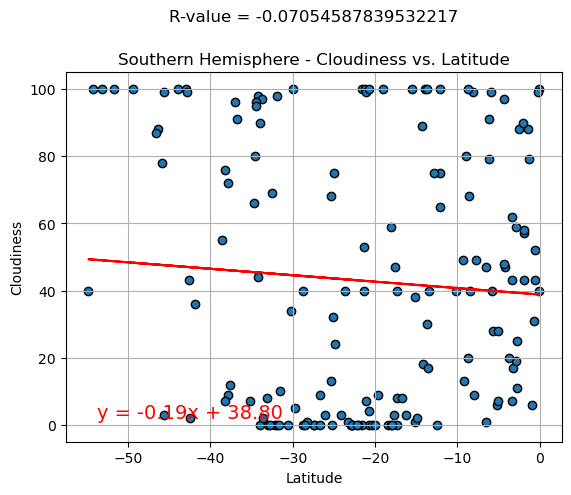

In [140]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 
"Southern Hemisphere - Cloudiness vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
In terms of cloudiness vs. latitude, the regression line is very weak again.
The data points are completely scattered across the graph in both plots which indicates that
latitude alone may not be a reliable predictor of cloudiness levels in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


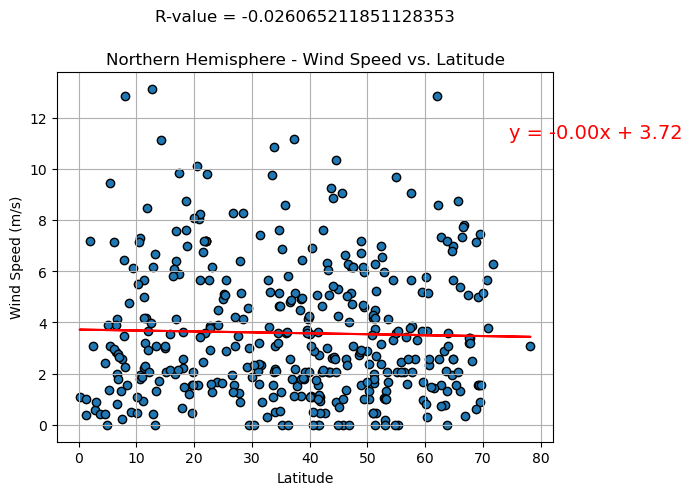

In [141]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", 
"Northern Hemisphere - Wind Speed vs. Latitude")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


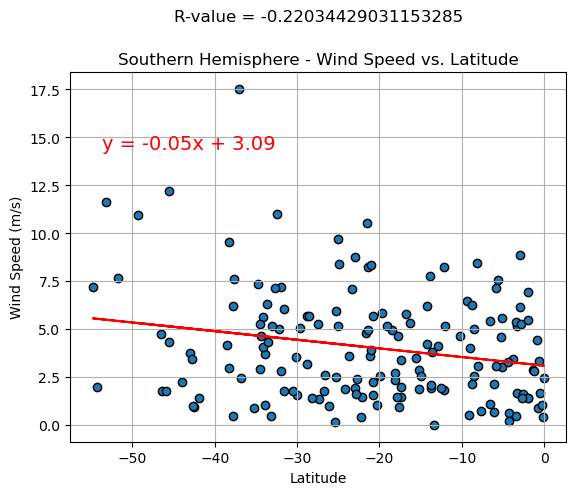

In [142]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", 
"Wind Speed (m/s)", "Southern Hemisphere - Wind Speed vs. Latitude")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Again, we see a similar pattern in regression lines. In these 2 plots, the data points are very scattered again.
The regression line is quite weak which indicates that latitude does not play a signifcant contribution to wind speed.
Although, the Southern Hemisphere does show a slight increase in wind speed the lower the latitude. The correlation
is still rather weak and not a strong enough result to say there is a strong connection between wind speed and latitude.